In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age               303 non-null int64
sex               303 non-null int64
cp                303 non-null int64
trestbps          303 non-null int64
chol              303 non-null int64
fbs               303 non-null int64
restecg           303 non-null int64
thalach           303 non-null int64
exang             303 non-null int64
oldpeak           303 non-null float64
slop              303 non-null int64
ca                303 non-null int64
thal              302 non-null float64
pred_attribute    303 non-null int64
dtypes: float64(2), int64(12)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,302.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.696370,4.728477,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.976658,1.939051,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,5.000000,7.000000,4.000000


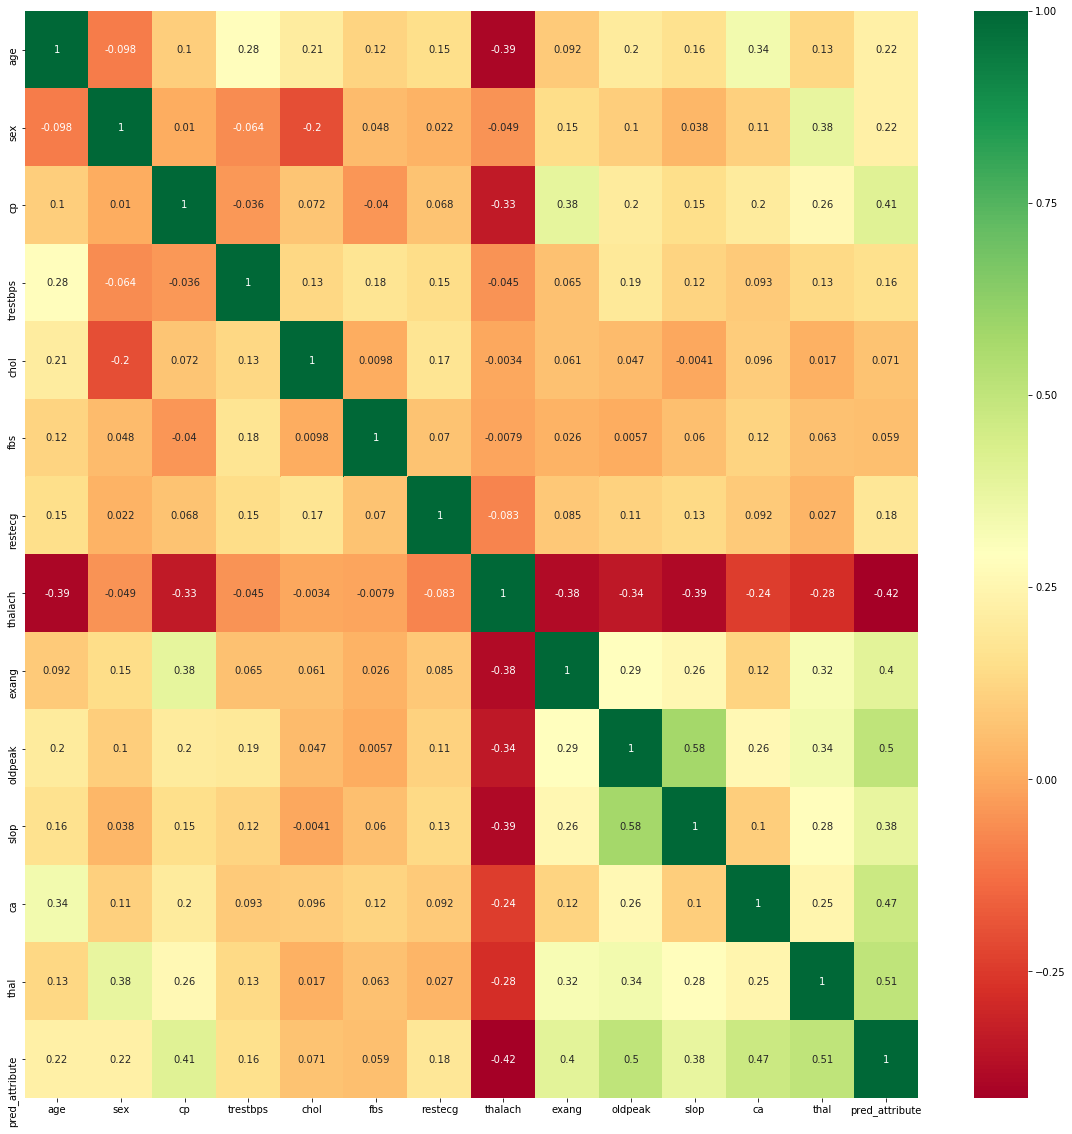

In [6]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d15a0f0>,
      dtype=object)

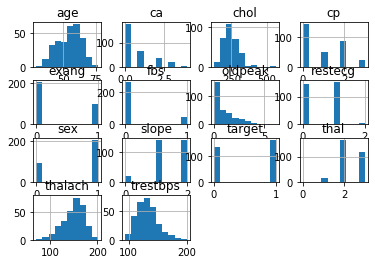

In [7]:
df.hist()

In [9]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slop', 'ca', 'thal'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,pred_attribute,sex_0,sex_1,cp_1,cp_2,...,slop_2,slop_3,ca_0,ca_1,ca_2,ca_3,ca_5,thal_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [14]:
y = dataset['pred_attribute']
X = dataset.drop(['pred_attribute'], axis = 1)

In [15]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

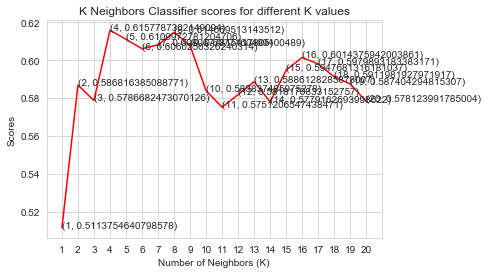

In [16]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
print(score)


[0.60606061 0.54545455 0.54545455 0.59375    0.5483871  0.5862069
 0.60714286 0.64285714 0.53571429 0.60714286]


In [18]:
score.mean()

0.5818170833152757